In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# allows debugger to be launched automatically on exception
%pdb 1


Automatic pdb calling has been turned ON


Please note that this notebook is most likely going to cause a stuck process. So if you are going to run it, please make sure to restart your jupyter notebook as soon as you completed running it.

The bug happens inside the `fastText` library, which we have no control over. You can check the status of this issue: [here](https://github.com/fastai/fastai/issues/754) and [here](https://github.com/facebookresearch/fastText/issues/618#issuecomment-419554225).

For the future, note that there're 3 separate implementations of fasttext, perhaps one of them works:
https://github.com/facebookresearch/fastText/tree/master/python
https://pypi.org/project/fasttext/
https://radimrehurek.com/gensim/models/fasttext.html#module-gensim.models.fasttext

## Translation files

In [0]:
from fastai.text import *

In [0]:
!curl -L -O https://github.com/ty2000/github_summary/releases/download/0.1/github-issues.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   608    0   608    0     0   2565      0 --:--:-- --:--:-- --:--:--  2565
100  979M  100  979M    0     0  34.6M      0  0:00:28  0:00:28 --:--:-- 36.2M


In [0]:
!unzip *zip

Archive:  github-issues.zip
  inflating: github_issues.csv       


In [0]:
!ls -l

total 3788908
-rw-r--r-- 1 root root 2852401417 Jan 17  2018 github_issues.csv
-rw-r--r-- 1 root root 1027424178 Apr 23 13:32 github-issues.zip
drwxr-xr-x 1 root root       4096 Apr  4 20:20 sample_data


In [0]:
!head -n 10 github_issues.csv

issue_url,issue_title,body
"""https://github.com/zhangyuanwei/node-images/issues/123""",can't load the addon. issue to: https://github.com/zhangyuanwei/node-images/issues error: /lib64/libc.so.6: version glibc_2.14' not found required by /usr/local/app/taf/fileserver.fileserver/bin/src/node_modules/images/bindings/linux/x64/8.0.0/binding.node,can't load the addon. issue to: https://github.com/zhangyuanwei/node-images/issues error: /lib64/libc.so.6: version glibc_2.14' not found required by /usr/local/app/taf/fileserver.fileserver/bin/src/node_modules/images/bindings/linux/x64/8.0.0/binding.node 有低点的版本，不需要glibc_2.14的吗
"""https://github.com/Microsoft/pxt/issues/2543""",hcl accessibility a11yblocking a11ymas mas4.2.10 hcl-makecode win10-edge -title screen reader-help-javascript-call a function narrator focus does not moving to expand side a documentation button after pressing enter on collapse side a documentation button.,user experience: user who depends on screen reader will get confuse

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('github_issues.csv').sample(n=100000)

In [0]:
df.describe()

,issue_url,issue_title,body
count,100000,100000,100000
unique,99970,96326,97079
top,"""https://github.com/cmty-test/cmty-repository-...",first from flow in uk south,first from flow in uk south
freq,7,1648,1648


In [0]:
PATH = Path('data/translate')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True, parents=True)

In [0]:
titles_raw = df["issue_title"].tolist()
body_raw = df["body"].tolist()

pickle.dump(titles_raw, (PATH/'title_raw.pkl').open('wb'))
pickle.dump(body_raw, (PATH/'body_raw.pkl').open('wb'))



In [0]:
title_raw = pickle.load((PATH/'title_raw.pkl').open('rb'));
body_raw = pickle.load((PATH/'body_raw.pkl').open('rb'));


In [0]:
type(titles_raw), len(titles_raw), len(body_raw)

(list, 100000, 100000)

In [0]:
title_raw[:5], body_raw[:5]

(['cannot unseal vault with wrong checksum',
  'falta un avenger',
  'how does @nuxtjs/proxy work with nuxt + express ?',
  'using a retail/non-steam version of hitman blood money causes the game to crash',
  'show military time format in p-calendar'],
 ["this issue is probably related to 3241, but covers another failure mode. when having a vault plugin mounted, if the checksum set in sys/plugins/catalog/stuff is wrong, vault cannot be unsealed, and thus, the offending mount cannot be removed, essentially bricking the vault database. the unsealing fails with the following log: 2017/11/20 15:53:41.048250 info core: vault is unsealed 2017/11/20 15:53:41.050187 info core: post-unseal setup starting 2017/11/20 15:53:41.052123 info core: loaded wrapping token key 2017/11/20 15:53:41.052161 info core: successfully setup plugin catalog: plugin-directory=/vault/plugins 2017/11/20 15:53:41.055848 info core: successfully mounted backend: type=generic path=secret/ 2017/11/20 15:53:41.056002 info 

In [0]:
tokenizer = Tokenizer()
title_tok = tokenizer.process_all(title_raw)
pickle.dump(title_tok, (PATH/'title_tok.pkl').open('wb'))

body_tok = tokenizer.process_all(body_raw)
pickle.dump(body_tok, (PATH/'body_tok.pkl').open('wb'))



In [0]:
title_tok = pickle.load((PATH/'title_tok.pkl').open('rb'))
body_tok =  pickle.load((PATH/'body_tok.pkl').open('rb'))
len(title_tok), len(body_tok)

(100000, 100000)

In [0]:
df = None

import gc

gc.collect()

7

In [0]:
idx = 11
title_tok[idx], title_raw[idx],body_tok[idx], body_raw[idx]

(['feature', 'request', 'swiping', 'panorama', 'on', 'mobile', 'phones'],
 'feature request swiping panorama on mobile phones',
 ['by',
  'default',
  ',',
  'to',
  'rotate',
  'panoramas',
  'you',
  'have',
  'to',
  'rotate',
  'the',
  'device',
  '.',
  'but',
  'this',
  'is',
  'impractical',
  'if',
  'you',
  'are',
  'sitting',
  'on',
  'a',
  'chair',
  '.',
  'rotating',
  'panoramas',
  'by',
  'swiping',
  'the',
  'touch',
  'screen',
  'is',
  'essential',
  '.',
  'it',
  "'s",
  'allowed',
  'by',
  'default',
  'in',
  'a',
  '-',
  'frame',
  'along',
  'side',
  'with',
  'gyro',
  'sensor',
  'input',
  '.',
  'thanks',
  'for',
  'you',
  'consideration',
  '.'],
 "by default, to rotate panoramas you have to rotate the device. but this is impractical if you are sitting on a chair. rotating panoramas by swiping the touch screen is essential. it's allowed by default in a-frame along side with gyro sensor input. thanks for you consideration.")

We have to keep the "sentence" size under a threshold, otherwise the padding will be too much

In [0]:
np.percentile([len(o) for o in title_tok], 90), np.percentile([len(o) for o in body_tok], 60)

(12.0, 74.0)

In [0]:
keep = np.array([len(o)<70 for o in body_tok])

We only keep data items whose body is shorter than 70. When we emoving rows this way, we use the same keep indice for both the body and title (X and Y)

In [0]:
body_tok = np.array(body_tok)[keep]
title_tok = np.array(title_tok)[keep]

In [0]:
pickle.dump(body_tok, (PATH/'body_tok.pkl').open('wb'))
pickle.dump(title_tok, (PATH/'title_tok.pkl').open('wb'))

In [0]:
body_tok = pickle.load((PATH/'body_tok.pkl').open('rb'))
title_tok = pickle.load((PATH/'title_tok.pkl').open('rb'))
len(body_tok), len(title_tok)

(57380, 57380)

In [0]:
def toks2ids(tok,pre):
    freq = Counter(p for o in tok for p in o)
    itos = [o for o,c in freq.most_common(40000)]
    itos.insert(0, '_bos_')
    itos.insert(1, '_pad_')
    itos.insert(2, '_eos_')
    itos.insert(3, '_unk')
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    ids = np.array([([stoi[o] for o in p] + [2]) for p in tok]) # note the _eos_ at the end
    np.save(TMP_PATH/f'{pre}_ids.npy', ids)
    pickle.dump(itos, open(TMP_PATH/f'{pre}_itos.pkl', 'wb'))
    return ids,itos,stoi

In [0]:
body_ids,body_itos,body_stoi = toks2ids(body_tok,'body')
title_ids,title_itos,title_stoi = toks2ids(title_tok,'title')

In [0]:
def load_ids(pre):
    ids = np.load(TMP_PATH/f'{pre}_ids.npy')
    itos = pickle.load(open(TMP_PATH/f'{pre}_itos.pkl', 'rb'))
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    return ids,itos,stoi

In [0]:
body_ids,body_itos,body_stoi = load_ids('body')
title_ids,title_itos,title_stoi = load_ids('title')

In [0]:
[title_itos[o] for o in title_ids[0]], title_ids[0], [body_itos[o] for o in body_ids[0]], body_ids[0], len(body_itos), len(title_itos)

(['falta', 'un', 'avenger', '_eos_'],
 [3134, 478, 5950, 2],
 ['falta',
  'un',
  'avenger',
  'por',
  'favor',
  ',',
  'agregar',
  'a',
  'nick',
  'fury',
  '_eos_'],
 [5447, 519, 11586, 1148, 3945, 8, 3667, 11, 5448, 16636, 2],
 40004,
 40004)

## Word vectors

fasttext word vectors available from https://fasttext.cc/docs/en/english-vectors.html

In [0]:
! pip install git+https://github.com/facebookresearch/fastText.git

  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-4ja9_usv
  Stored in directory: /tmp/pip-ephem-wheel-cache-xhwo004z/wheels/69/f8/19/7f0ab407c078795bc9f86e1f6381349254f86fd7d229902355
Successfully built fasttext


In [0]:
import fastText as ft

To use the fastText library, you'll need to download [fasttext word vectors](https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) for your language (download the 'bin plus text' ones).

In [0]:
!curl https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip -o {PATH}/wiki.en.zip
!unzip {PATH}/wiki.en.zip -d {PATH}

#!mv wiki.en* {PATH}

  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9877M  100 9877M    0     0   9.8M      0  0:16:38  0:16:38 --:--:-- 12.0M
Archive:  data/translate/wiki.en.zip
  inflating: data/translate/wiki.en.vec  
  inflating: data/translate/wiki.en.bin  


In [0]:
en_vecs = ft.load_model(str((PATH/'wiki.en.bin')))

In [0]:
type(en_vecs.get_words()), len(en_vecs.get_words()), en_vecs.get_words()[100:105]

(list, 2519370, ['out', 'state', 'states', 'national', 'wikipedia'])

In [0]:
def get_vecs(token_type, ft_vecs, token_list):
    vecd = {w:ft_vecs.get_word_vector(w) for w in token_list}
    pickle.dump(vecd, open(PATH/f'wiki.embedding.{token_type}.pkl','wb'))
    return vecd

Lookup the word vector (embedding) from the fasttext trained dictionary

In [0]:
body_vecd = get_vecs('body', en_vecs, body_itos)
title_vecd = get_vecs('title', en_vecs, title_itos)


In [0]:
body_vecd = pickle.load(open(PATH/'wiki.embedding.body.pkl','rb'))
title_vecd = pickle.load(open(PATH/'wiki.embedding.title.pkl','rb'))
len(body_vecd), len(title_vecd)

(40004, 40004)

In [0]:
len(body_itos), len(title_itos),

(40004, 40004)

In [0]:
dim_body_vec = len(body_vecd[','])
dim_title_vec = len(title_vecd[','])
dim_body_vec, dim_title_vec

(300, 300)

In [0]:
en_vecs = None
gc.collect()

0

## Model data

In [0]:
body_len_90 = int(np.percentile([len(o) for o in body_ids], 99))
title_len_90 = int(np.percentile([len(o) for o in title_ids], 99))
body_len_90,title_len_90

(70, 20)

In [0]:
def trim_and_pad(rows, max_len:int=100, pad_index:int=1, pad_first:bool=True):
  trimmed = np.array([o[:max_len] for o in rows])
  res = np.zeros([len(rows), max_len], dtype=int) + pad_index  #initialize all cells to pad_index
  for i,s in enumerate(trimmed):
    if pad_first: res[i,-len(s):] = s
    else:         res[i,:len(s)] = s
  return res
  

In [0]:
x = trim_and_pad(title_ids[1:5], max_len=19, pad_first=False)
[len(o) for o in x]

[19, 19, 19, 19]

This time we trim by column, in other words, we throw away whatever that
is beyond the max length

In [0]:
#body_ids_trimmed = np.array([o[:body_len_90] for o in body_ids])
#title_ids_trimmed = np.array([o[:title_len_90] for o in title_ids])

In [0]:
body_ids_trimmed = trim_and_pad(body_ids, body_len_90, pad_first=False)
title_ids_trimmed = trim_and_pad(title_ids, title_len_90, pad_first=False)

In [0]:
def A(*a):
    """convert iterable object into numpy array"""
    return np.array(a[0]) if len(a)==1 else [np.array(o) for o in a]

In [0]:
class Seq2SeqDataset(Dataset):
    def __init__(self, x, y): self.x,self.y = x,y
    def __getitem__(self, idx): return A(self.x[idx], self.y[idx])
    def __len__(self): return len(self.x)

In [0]:
np.random.seed(42)
trn_keep = np.random.rand(len(body_ids_trimmed))>0.1
body_trn,title_trn = body_ids_trimmed[trn_keep],title_ids_trimmed[trn_keep]
body_val,title_val = body_ids_trimmed[~trn_keep],title_ids_trimmed[~trn_keep]
len(body_trn),len(body_val),len(title_trn), len(title_val)

(51625, 5755, 51625, 5755)

In [0]:
trn_ds = Seq2SeqDataset(body_trn,title_trn)
val_ds = Seq2SeqDataset(body_val,title_val)

In [0]:
trn_ds[12], val_ds[7]

([array([ 19,  30,  20, 585, ...,   1,   1,   1,   1]),
  array([  42,   34,   21, 1045, 1411,  305,    5, 3853,    6, 3854, 9125,    2,    1,    1,    1,    1,    1,    1,
            1,    1])],
 [array([ 16,  47, 702,   7, ...,   1,   1,   1,   1]),
  array([370, 399, 455, 158, 259,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])])

In [0]:
bs=125

In [0]:
trn_samp = SortishSampler(body_trn, key=lambda x: len(body_trn[x]), bs=bs)
val_samp = SortSampler(body_val, key=lambda x: len(body_val[x]))

In [0]:
class Seq2SeqTextDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training a Seq2Seq RNN classifier."
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=32, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, num_workers=0, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            sampler = SortSampler(ds.x, key=lambda t: len(datasets[0][t][0].data))
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler,num_workers=0,  **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, collate_fn=collate_fn, no_check=no_check)

In [0]:
#md = ModelData(PATH, trn_dl, val_dl)
#ModelData is now DataBunch
md = Seq2SeqTextDataBunch.create(trn_ds, val_ds, None, PATH, bs, pad_first=False)

## Initial model

In [0]:
import pdb

In [0]:
def create_emb(vecs, itos, em_sz):
    emb = nn.Embedding(len(itos), em_sz, padding_idx=1)
    wgts = emb.weight.data
    miss = []
    for i,w in enumerate(itos):
        try: wgts[i] = torch.from_numpy(vecs[w]*3)
        except: miss.append(w)
    print(len(miss),miss[5:10])
    return emb

In [0]:
# nh,nl = 256,2
nh,nl = 256,2

In [0]:
class Seq2SeqRNN(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
#         pdb.set_trace()
# transpose inp
        inp = inp.t()
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

#         dec_inp = V(torch.zeros(bs).long())
        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
#             dec_inp = V(outp.data.max(1)[1])
            dec_inp = outp.data.max(1)[1]
            if (dec_inp==1).all(): break
#  ugly hack, since rnn.py expects the true output to be in the first element      
#         return torch.stack(res)
        res = torch.stack(res)
        res = [res, res, res]
        return res
    
#     def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))
    def initHidden(self, bs): return to_device(torch.zeros(self.nl, bs, self.nh),'cuda:0')
    
    def reset(self):
#         self.gru_enc.reset()
#         self.out_enc.reset()
#         self.gru_dec.reset()
#         self.out.reset()
         pass


In [0]:
def seq2seq_loss(input, target):
    target2 = target.t()
    sl,bs = target2.size()
#    bs,sl = target.size()
    sl_in,bs_in,nc = input.size()
#     bs_in,sl_in,nc = input.size()
    if sl>sl_in: input = F.pad(input, (0,0,0,0,0,sl-sl_in))
    input = input[:sl]
    return F.cross_entropy(input.view(-1,nc), target2.contiguous().view(-1))#, ignore_index=1)

In [0]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [0]:
rnn = Seq2SeqRNN(body_vecd, body_itos, dim_body_vec, title_vecd, title_itos, dim_title_vec, nh, title_len_90,nl)
#learn = RNNLearner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn=RNNLearner(md, rnn, opt_func=opt_fn)
#learn.crit = seq2seq_loss
learn.loss_func = seq2seq_loss

0 []
0 []


In [0]:
%debug -b /usr/local/lib/python3.6/dist-packages/fastai/text/data.py:130

Breakpoint 1 at /usr/local/lib/python3.6/dist-packages/fastai/text/data.py:130
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


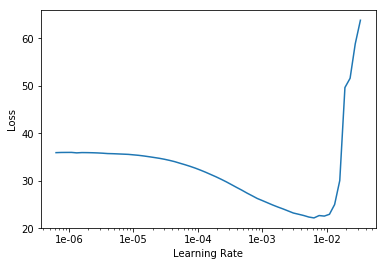

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=5e-4

In [0]:
#learn.fit(lr, 1, cycle_len=12, use_clr=(20,10))
learn.fit_one_cycle(cyc_len=200, max_lr=lr)

epoch,train_loss,valid_loss,time
0,4.336642,5.559607,02:43
1,4.635474,5.564852,02:43
2,4.396523,5.603096,02:44
3,4.657037,5.769261,02:43
4,4.531082,5.641433,02:43
5,4.690431,5.730429,02:42
6,4.518584,5.788997,02:43
7,4.605886,5.497457,02:44
8,4.182817,5.512666,02:44
9,4.333531,5.451545,02:44


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.save('initial')

In [0]:
learn.load('initial')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Seq2SeqRNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


RNNLearner(data=Seq2SeqTextDataBunch;

Train: <__main__.Seq2SeqDataset object at 0x7f61b683b780>;

Valid: <__main__.Seq2SeqDataset object at 0x7f61b683b748>;

Test: None, model=Seq2SeqRNN(
  (emb_enc): Embedding(40004, 300, padding_idx=1)
  (emb_enc_drop): Dropout(p=0.15)
  (gru_enc): GRU(300, 256, num_layers=10, dropout=0.25)
  (out_enc): Linear(in_features=256, out_features=300, bias=False)
  (emb_dec): Embedding(15452, 300, padding_idx=1)
  (gru_dec): GRU(300, 300, num_layers=10, dropout=0.1)
  (out_drop): Dropout(p=0.35)
  (out): Linear(in_features=300, out_features=15452, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.8, 0.99)), loss_func=<function seq2seq_loss at 0x7f61521dd620>, metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('data/translate'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True)], callbacks=[RNNTrainer
learn: RNNLearner(data=Seq2SeqTextDataBunch

### Test

In [0]:

sampler = SortSampler(val_ds.x, key=lambda t: len(val_ds[t][0].data))
val_dl = DataLoader(val_ds, batch_size=bs, sampler=sampler,num_workers=0)

AttributeError: ignored

> /usr/local/lib/python3.6/dist-packages/fastai/torch_core.py(123)to_device()
    121     if is_listy(b): return [to_device(o, device) for o in b]
    122     if is_dict(b): return {k: to_device(v, device) for k, v in b.items()}
--> 123     return b.to(device, non_blocking=True)
    124 
    125 def data_collate(batch:ItemsList)->Tensor:

ipdb> c


In [0]:
x,y = next(iter(val_dl))
x = to_device(x, 'cuda:0')
y = to_device(y, 'cuda:0')
probs = learn.model(x)
preds = to_np(probs[0].data.max(2)[1].t())


for i in range(80,90):
    print(' '.join([body_itos[o] for o in x[i,:] if o != 1]))
    print(' '.join([title_itos[o] for o in y[i,:] if o != 1]))
    print(' '.join([title_itos[o] for o in preds[i,:] if o!=1]))
    print()

now that flatlist and virtualizedlist is around corner available in 0.42.rc-3 , is there any plan to update the documentation as well ? from a quick skim there 's seemed to be a bunch of new properties to the virtualizedlist which is much worth documenting . _eos_
add documentation for flatlist and underlying virtualizedlist ? _eos_
fix : - in in _eos_ _eos_

in the video , the probability table for p c includes a column for r. i 'd expect to only have c values : 
  + c = > 0.5 
  -c = > 0.5 _eos_
lesson 14.14 - p c table includes r _eos_
issue : : - - _eos_ _eos_

first from flow in uk south _eos_
first from flow in uk south _eos_
first from flow in uk south _eos_

- 하위 메뉴를 펼칠 때 위치를 잘못 표시 함 - 모바일 페이지와 충돌 _eos_
메뉴를 처리하는 스크립트가 메뉴를 잘못된 방법으로 펼침 _eos_
	 - - _eos_ _eos_

i crash-2017 - 09 - 13_22.55.21-client.txt https : / / github.com / chisel - team / chisel / files / 1301637 / crash-2017 - 09 - 13_22.55.21-client.txt usually get this from super circuit maker but not sure why chisel is re

## Bidir

In [0]:
class Seq2SeqRNN_Bidir(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=True)
        self.out_enc = nn.Linear(nh*2, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.05)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))

        dec_inp = V(torch.zeros(bs).long())
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
        return torch.stack(res)
    
    def initHidden(self, bs): return V(torch.zeros(self.nl*2, bs, self.nh))

In [0]:
rnn = Seq2SeqRNN_Bidir(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

In [0]:
learn.fit(lr, 1, cycle_len=12, use_clr=(20,10))

A Jupyter Widget

epoch      trn_loss   val_loss                              
    0      4.896942   4.761351  
    1      4.323335   4.260878                              
    2      3.962747   4.06161                               
    3      3.596254   3.940087                              
    4      3.432788   3.944787                              
    5      3.310895   3.686629                              
    6      3.454976   3.638168                              
    7      3.093827   3.588456                              
    8      3.257495   3.610536                              
    9      3.033345   3.540344                              
    10     2.967694   3.516766                              
    11     2.718945   3.513977                              



[3.5139771]

In [0]:
learn.save('bidir')

## Teacher forcing

In [0]:
class Seq2SeqStepper(Stepper):
    def step(self, xs, y, epoch):
        self.m.pr_force = (10-epoch)*0.1 if epoch<10 else 0
        xtra = []
        output = self.m(*xs, y)
        if isinstance(output,tuple): output,*xtra = output
        self.opt.zero_grad()
        loss = raw_loss = self.crit(output, y)
        if self.reg_fn: loss = self.reg_fn(output, xtra, raw_loss)
        loss.backward()
        if self.clip:   # Gradient clipping
            nn.utils.clip_grad_norm(trainable_params_(self.m), self.clip)
        self.opt.step()
        return raw_loss.data[0]

In [0]:
class Seq2SeqRNN_TeacherForcing(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        self.pr_force = 1.
        
    def forward(self, inp, y=None):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

        dec_inp = V(torch.zeros(bs).long())
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (y is not None) and (random.random()<self.pr_force):
                if i>=len(y): break
                dec_inp = y[i]
        return torch.stack(res)
    
    def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))

In [0]:
rnn = Seq2SeqRNN_TeacherForcing(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

In [0]:
learn.fit(lr, 1, cycle_len=12, use_clr=(20,10), stepper=Seq2SeqStepper)

A Jupyter Widget

epoch      trn_loss   val_loss                              
    0      4.460622   12.661013 
    1      3.468132   7.138729                              
    2      3.235244   6.202878                              
    3      3.101616   5.454283                              
    4      3.135989   4.823736                              
    5      2.980696   4.933402                              
    6      2.91562    4.287475                              
    7      3.032661   3.975346                              
    8      3.103834   3.790773                              
    9      3.121457   3.578682                              
    10     2.917534   3.532427                              
    11     3.326946   3.490643                              



[3.490643]

In [0]:
learn.save('forcing')

## Attentional model

In [0]:
def rand_t(*sz): return torch.randn(sz)/math.sqrt(sz[0])
def rand_p(*sz): return nn.Parameter(rand_t(*sz))

In [0]:
class Seq2SeqAttnRNN(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data

        self.W1 = rand_p(nh, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh, em_sz_dec)
        self.V = rand_p(em_sz_dec)

    def forward(self, inp, y=None, ret_attn=False):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

        dec_inp = V(torch.zeros(bs).long())
        res,attns = [],[]
        w1e = enc_out @ self.W1
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(w1e + w2h)
            a = F.softmax(u @ self.V, 0)
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (y is not None) and (random.random()<self.pr_force):
                if i>=len(y): break
                dec_inp = y[i]

        res = torch.stack(res)
        if ret_attn: res = res,torch.stack(attns)
        return res

    def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))

In [0]:
rnn = Seq2SeqAttnRNN(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

In [0]:
lr=2e-3

In [0]:
learn.fit(lr, 1, cycle_len=15, use_clr=(20,10), stepper=Seq2SeqStepper)

A Jupyter Widget

epoch      trn_loss   val_loss                              
    0      3.882168   11.125291 
    1      3.599992   6.667136                              
    2      3.236066   5.552943                              
    3      3.050283   4.919096                              
    4      2.99024    4.500383                              
    5      3.07999    4.000295                              
    6      2.891087   4.024115                              
    7      2.854725   3.673913                              
    8      2.979285   3.590668                              
    9      3.109851   3.459867                              
    10     2.92878    3.517598                              
    11     2.778292   3.390253                              
    12     2.795427   3.388423                              
    13     2.809757   3.353334                              
    14     2.6723     3.368584                              



[3.3685837]

In [0]:
learn.save('attn')

In [0]:
learn.load('attn')

### Test

In [0]:
x,y = next(iter(val_dl))
probs,attns = learn.model(V(x),ret_attn=True)
preds = to_np(probs.max(2)[1])

In [0]:
for i in range(180,190):
    print(' '.join([fr_itos[o] for o in x[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o!=1]))
    print()

quels facteurs pourraient influer sur le choix de leur emplacement ? _eos_
what factors influencetheir location ? _eos_
what factors might influence the their their their ? _eos_

qu’ est -ce qui ne peut pas changer ? _eos_
what can not change ? _eos_
what can not change change ? _eos_

que faites - vous ? _eos_
what do you do ? _eos_
what do you do ? _eos_

qui réglemente les pylônes d' antennes ? _eos_
who regulates antenna towers ? _eos_
who regulates the lights ? ? _eos_

où sont - ils situés ? _eos_
where are they located ? _eos_
where are they located ? _eos_

quelles sont leurs compétences ? _eos_
what are their qualifications ? _eos_
what are their skills ? _eos_

qui est victime de harcèlement sexuel ? _eos_
who experiences sexual harassment ? _eos_
who is victim sexual sexual ? _eos_

quelles sont les personnes qui visitent les communautés autochtones ? _eos_
who visits indigenous communities ? _eos_
who is people people aboriginal people ? _eos_

pourquoi ces trois points en

In [0]:
attn = to_np(attns[...,180])

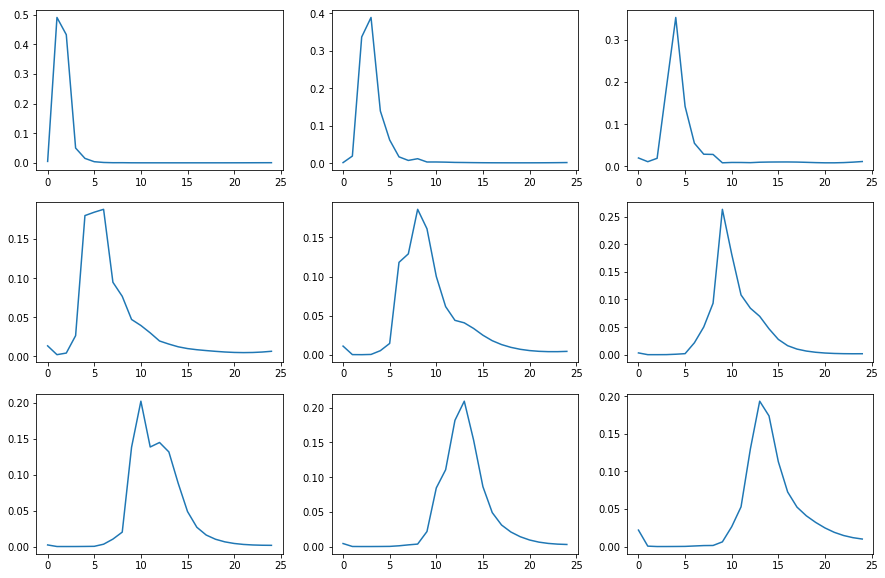

In [0]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i,ax in enumerate(axes.flat):
    ax.plot(attn[i])

## All

In [0]:
class Seq2SeqRNN_All(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=True)
        self.out_enc = nn.Linear(nh*2, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.25)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data

        self.W1 = rand_p(nh*2, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh*2, em_sz_dec)
        self.V = rand_p(em_sz_dec)

    def forward(self, inp, y=None):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))

        dec_inp = V(torch.zeros(bs).long())
        res,attns = [],[]
        w1e = enc_out @ self.W1
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(w1e + w2h)
            a = F.softmax(u @ self.V, 0)
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (y is not None) and (random.random()<self.pr_force):
                if i>=len(y): break
                dec_inp = y[i]
        return torch.stack(res)

    def initHidden(self, bs): return V(torch.zeros(self.nl*2, bs, self.nh))

In [0]:
rnn = Seq2SeqRNN_All(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

In [0]:
learn.fit(lr, 1, cycle_len=15, use_clr=(20,10), stepper=Seq2SeqStepper)

A Jupyter Widget

epoch      trn_loss   val_loss                              
    0      3.817306   7.527982  
    1      3.239813   5.82099                               
    2      3.06717    5.437195                              
    3      3.077923   4.718295                              
    4      2.952973   4.337892                              
    5      3.018182   3.994012                              
    6      2.761607   3.777056                              
    7      2.913683   3.595531                              
    8      2.91521    3.46984                               
    9      2.921533   3.370839                              
    10     2.913826   3.336167                              
    11     2.746896   3.37274                               
    12     2.695839   3.332427                              
    13     2.531583   3.341861                              
    14     2.524642   3.324184                              



[3.3241842]

### Test

In [0]:
x,y = next(iter(val_dl))
probs = learn.model(V(x))
preds = to_np(probs.max(2)[1])

for i in range(180,190):
    print(' '.join([fr_itos[o] for o in x[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o!=1]))
    print()

quels facteurs pourraient influer sur le choix de leur emplacement ? _eos_
what factors influencetheir location ? _eos_
what factors might affect the choice of their ? ? _eos_

qu’ est -ce qui ne peut pas changer ? _eos_
what can not change ? _eos_
what can not change change _eos_

que faites - vous ? _eos_
what do you do ? _eos_
what do you do ? _eos_

qui réglemente les pylônes d' antennes ? _eos_
who regulates antenna towers ? _eos_
who regulates the antenna ? ? _eos_

où sont - ils situés ? _eos_
where are they located ? _eos_
where are they located ? _eos_

quelles sont leurs compétences ? _eos_
what are their qualifications ? _eos_
what are their skills ? _eos_

qui est victime de harcèlement sexuel ? _eos_
who experiences sexual harassment ? _eos_
who is victim harassment harassment ? _eos_

quelles sont les personnes qui visitent les communautés autochtones ? _eos_
who visits indigenous communities ? _eos_
who are the people people ? ?

pourquoi ces trois points en particulier 